In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [3]:
X_train=np.load(r'C:\Users\HP\Desktop\AI\Skin Cancer\train_dataset\x_train.npy')
Y_train=np.load(r'C:\Users\HP\Desktop\AI\Skin Cancer\train_dataset\y_train.npy')
X_test=np.load(r'C:\Users\HP\Desktop\AI\Skin Cancer\test_dataset\x_test.npy')
Y_test=np.load(r'C:\Users\HP\Desktop\AI\Skin Cancer\test_dataset\y_test.npy')

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2000, 128, 128, 1) (2000, 2) (120, 128, 128, 1) (120, 2)


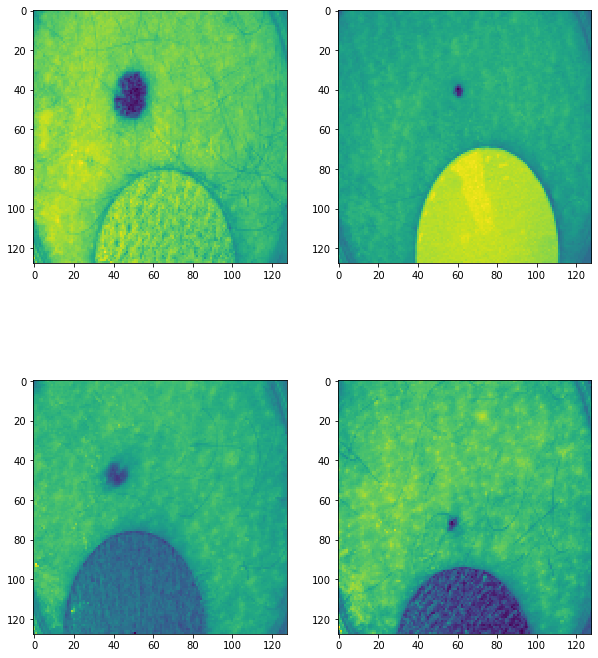

In [5]:
fig, axarr = plt.subplots(2,2, figsize=(10,12.5))
axarr[0,0].imshow(X_train[0], interpolation='nearest')
axarr[0,1].imshow(X_train[1], interpolation='nearest')
axarr[1,0].imshow(X_train[2], interpolation='nearest')
axarr[1,1].imshow(X_train[3], interpolation='nearest')
plt.show()

In [6]:
Y_train=Y_train[:,0].astype(int)
Y_test=Y_test[:,0].astype(int)

In [7]:
Y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
Y_train

array([1, 1, 1, ..., 1, 1, 1])

### PCA to reduction the dimension

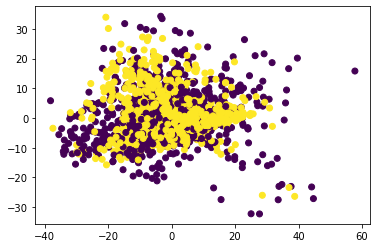

In [9]:
pca=PCA(n_components=2)
pca=pca.fit_transform(X_train.reshape(2000, 128*128))
plt.scatter(pca[:,0], pca[:,1],c=Y_train)
plt.show()

In [10]:
pca=PCA(n_components=120)
X_train=pca.fit_transform(X_train.reshape(2000, 128*128))
X_test=pca.fit_transform(X_test.reshape(120, 128*128))
print(X_train.shape, X_test.shape)

(2000, 120) (120, 120)


### KNN

accuracy: 0.5666666666666667
Classificatio report               precision    recall  f1-score   support

           0       0.56      0.65      0.60        60
           1       0.58      0.48      0.53        60

    accuracy                           0.57       120
   macro avg       0.57      0.57      0.56       120
weighted avg       0.57      0.57      0.56       120



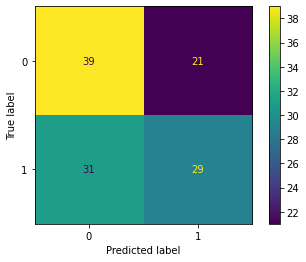

In [11]:
clf=KNeighborsClassifier(n_neighbors=2).fit(X_train, Y_train)
clf_score=clf.score(X_test, Y_test)
print('accuracy:', clf_score)
y_pred=clf.predict(X_test)
con_met=confusion_matrix(Y_test, y_pred, labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=con_met, display_labels=clf.classes_)
classification_rep=classification_report(Y_test,y_pred)
print('Classificatio report', classification_rep)
disp.plot()
plt.show()

accuracy: 0.55
Classificatio report               precision    recall  f1-score   support

           0       0.56      0.47      0.51        60
           1       0.54      0.63      0.58        60

    accuracy                           0.55       120
   macro avg       0.55      0.55      0.55       120
weighted avg       0.55      0.55      0.55       120



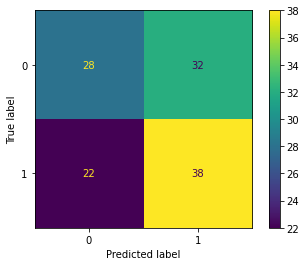

In [12]:
clf=KNeighborsClassifier(n_neighbors=3).fit(X_train, Y_train)
clf_score=clf.score(X_test, Y_test)
print('accuracy:', clf_score)
y_pred=clf.predict(X_test)
con_met=confusion_matrix(Y_test, y_pred, labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=con_met, display_labels=clf.classes_)
classification_rep=classification_report(Y_test,y_pred)
print('Classificatio report', classification_rep)
disp.plot()
plt.show()

accuracy: 0.5833333333333334
Classificatio report               precision    recall  f1-score   support

           0       0.60      0.52      0.55        60
           1       0.57      0.65      0.61        60

    accuracy                           0.58       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.58      0.58      0.58       120



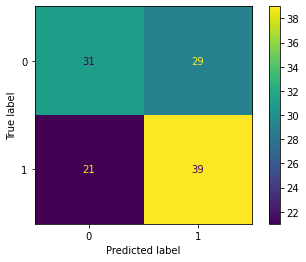

In [13]:
clf=KNeighborsClassifier(n_neighbors=8).fit(X_train, Y_train)
clf_score=clf.score(X_test, Y_test)
print('accuracy:', clf_score)
y_pred=clf.predict(X_test)
con_met=confusion_matrix(Y_test, y_pred, labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=con_met, display_labels=clf.classes_)
classification_rep=classification_report(Y_test,y_pred)
print('Classificatio report', classification_rep)
disp.plot()
plt.show()

accuracy: 0.5833333333333334
Classificatio report
               precision    recall  f1-score   support

           0       0.61      0.47      0.53        60
           1       0.57      0.70      0.63        60

    accuracy                           0.58       120
   macro avg       0.59      0.58      0.58       120
weighted avg       0.59      0.58      0.58       120



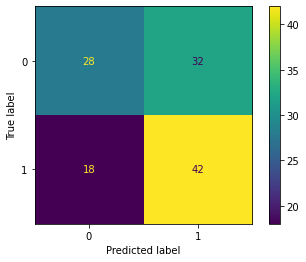

In [14]:
clf=KNeighborsClassifier(n_neighbors=21, weights='uniform').fit(X_train, Y_train)
clf_score=clf.score(X_test, Y_test)
print('accuracy:', clf_score)
y_pred=clf.predict(X_test)
con_met=confusion_matrix(Y_test, y_pred, labels=clf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=con_met, display_labels=clf.classes_)
classification_rep=classification_report(Y_test,y_pred)
print('Classificatio report\n', classification_rep)
disp.plot()
plt.show()